In [1]:
import numpy as np
import control

import kontrol.core.frequency_series.frequency_series
import kontrol.core.frequency_series.noise_models
import kontrol.controlutils



In [2]:
f = np.logspace(-2, 3, 1000)
s = 1j*2*np.pi*f
x_correct = 2 * ((s/0.1+1)
            /(s/1+1)
            *(s**2+10/100*s+10**2) / 10**2
            /(s**2+100/1000*s+100**2) * 100**2
            /(s/5+1))
zeros = [0.1]
poles = [1, 5]
zeros_wn = [10]
zeros_q = [100]
poles_wn = [100]
poles_q = [1000]
dc_gain = 2
unit = "s"
sos = kontrol.controlutils.generic_tf(
    zeros, poles, zeros_wn, zeros_q, poles_wn, poles_q, dc_gain, unit)

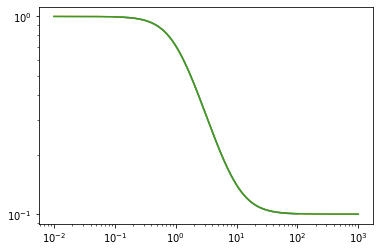

In [4]:
import matplotlib.pyplot as plt

plt.loglog(f, (sos(s)))
plt.loglog(f, )

In [5]:
np.isclose(f[1]-f[0], f[2]-f[1])

True

In [6]:
np.allclose(fs.args_empirical_model, [1,10])

True

In [7]:
fs.args_empirical_model

array([1.        , 9.99999996])

In [10]:
import kontrol.core.complementary_filter.complementary_filter as cm
import control
import numpy as np
import matplotlib.pyplot as plt
import kontrol.core.frequency_series.noise_models

# lvdt_noise = kontrol.core.frequency_series.noise_models()
lpf = control.tf([1], [1, 1])
hpf = 1 - lpf
omega = np.logspace(-2,2,1000)
f = omega/2/np.pi
lvdt_noise = kontrol.core.frequency_series.noise_models.lvdt_noise(f=f)
geophone_noise = kontrol.core.frequency_series.noise_models.geophone_noise(f=f)

comp = cm.ComplementaryFilter(noise1=lvdt_noise, noise2=geophone_noise, f=f, unit="omega")

# plt.loglog(omega, lvdt_noise)
# plt.loglog(omega, geophone_noise)
# plt.loglog(omega, abs(lpf(1j*omega)))
# plt.loglog(omega, abs(hpf(1j*omega)))

AttributeError: 'NoneType' object has no attribute 'num'

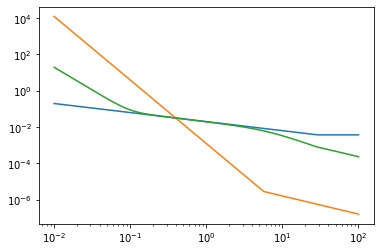

In [9]:
plt.loglog(omega, lvdt_noise)
plt.loglog(omega, geophone_noise)
plt.loglog(omega, comp.noise_super)
# plt.loglog(omega, abs(lpf(1j*omega)))
# plt.loglog(omega, abs(hpf(1j*omega)))

In [6]:
comp.noise_super

array([1.97925344e+01, 1.93415923e+01, 1.89009256e+01, 1.84703002e+01,
       1.80494872e+01, 1.76382632e+01, 1.72364095e+01, 1.68437128e+01,
       1.64599643e+01, 1.60849602e+01, 1.57185013e+01, 1.53603929e+01,
       1.50104447e+01, 1.46684708e+01, 1.43342894e+01, 1.40077231e+01,
       1.36885984e+01, 1.33767456e+01, 1.30719992e+01, 1.27741971e+01,
       1.24831812e+01, 1.21987969e+01, 1.19208931e+01, 1.16493221e+01,
       1.13839396e+01, 1.11246046e+01, 1.08711794e+01, 1.06235293e+01,
       1.03815227e+01, 1.01450311e+01, 9.91392880e+00, 9.68809299e+00,
       9.46740371e+00, 9.25174370e+00, 9.04099838e+00, 8.83505577e+00,
       8.63380646e+00, 8.43714352e+00, 8.24496246e+00, 8.05716118e+00,
       7.87363988e+00, 7.69430106e+00, 7.51904943e+00, 7.34779189e+00,
       7.18043742e+00, 7.01689712e+00, 6.85708410e+00, 6.70091342e+00,
       6.54830213e+00, 6.39916913e+00, 6.25343517e+00, 6.11102283e+00,
       5.97185644e+00, 5.83586205e+00, 5.70296739e+00, 5.57310187e+00,
      

In [7]:
?kontrol.core.frequency_series.noise_models.lvdt_noise